# Load Data - babynames

In [1]:
import pandas as pd
import numpy as np
np.random.seed(24)


Output hidden; open in https://colab.research.google.com to view.

In [2]:
import urllib.request
import os.path

# Download data from the web directly
data_url = "https://www.ssa.gov/oact/babynames/names.zip"
local_filename = "babynames.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

babynames.zip is downloaded in the current folder. Inside the babynames.zip, there are txt files, named from yob1880~yob2020, each txt file contains data like:
Olivia,F,17535
Emma,F,15581
....

In [72]:
# Load data without unzipping the file
import zipfile
babynames = [] 
local_filename = "babynames.zip"
with zipfile.ZipFile(local_filename, "r") as zf:
    data_files = [f for f in zf.filelist if f.filename[-3:] == "txt"]
    def extract_year_from_filename(fn):
        return int(fn[3:7])
    for f in data_files:
        year = extract_year_from_filename(f.filename)
        with zf.open(f) as fp:
            df = pd.read_csv(fp, names=["Name", "Sex", "Count"])
            df["Year"] = year
            babynames.append(df)
babynames = pd.concat(babynames)

In [73]:
babynames.head()

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [74]:
babynames.tail()

,Name,Sex,Count,Year
31266,Zykell,M,5,2020
31267,Zylus,M,5,2020
31268,Zymari,M,5,2020
31269,Zyn,M,5,2020
31270,Zyran,M,5,2020


In [75]:
babynames['Name'] = babynames['Name'].str.lower()#change name to lower case
babynames.head()

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880


In [76]:
babynames.size

8083452

# Exploratory Data Analysis (EDA)

In [77]:
babynames['Count'].sum()

358480709

In [78]:
format(babynames['Count'].sum(), ',d')    # total number of babies represented

'358,480,709'

In [79]:
format(babynames.shape[0], ',d')    # total number of names represented

'2,020,863'

Trying a simple query:

In [80]:
babynames[(babynames['Name'] == 'ethan') & (babynames['Year'] == 2016)]

,Name,Sex,Count,Year
8119,ethan,F,14,2016
18856,ethan,M,13834,2016


## Pivot Table

How to group data using index in a pivot table?
pivot_table requires a data and an index parameter
data is the Pandas dataframe you pass to the function
index is the feature that allows you to group your data. The index feature will appear as an index in the resultant table
ref: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html


In [81]:
pdsex = pd.pivot_table(babynames, 
        index=['Sex', 'Year'], # the row index
        aggfunc='sum'
    )

In [82]:
pdsex

Count
Sex Year         
F   1880    90994
    1881    91953
    1882   107847
    1883   112319
    1884   129019
...           ...
M   2016  1893917
    2017  1846154
    2018  1810309
    2019  1785527
    2020  1706423

[282 rows x 1 columns]

In [83]:
subset=babynames[(babynames['Year'] > 2000)].copy()

In [84]:
subset

,Name,Sex,Count,Year
0,emily,F,25057,2001
1,madison,F,22166,2001
2,hannah,F,20720,2001
3,ashley,F,16528,2001
4,alexis,F,16402,2001
...,...,...,...,...
31266,zykell,M,5,2020
31267,zylus,M,5,2020
31268,zymari,M,5,2020
31269,zyn,M,5,2020


In [86]:
pdonesex = pd.pivot_table(subset, 
        index=['Year'], # the row index
        aggfunc='sum'
    )

In [87]:
pdonesex

,Count
Year,
2001,3742401
2002,3737195
2003,3801147
2004,3819591
2005,3843322
2006,3954356
2007,3995740
2008,3928389
2009,3817731


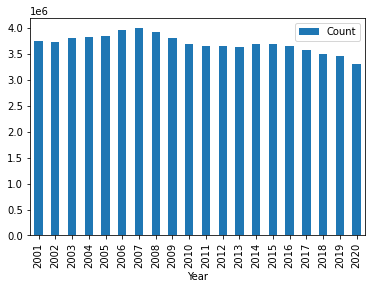

In [88]:
pdonesex.plot(kind='bar');

Proportion of Male and Female Individuals Over Time

In this example we construct a **pivot table** which aggregates the number of babies registered for each year by `Sex`.

In [89]:
year_sex = pd.pivot_table(subset, 
        index=['Year'], # the row index
        columns=['Sex'], # the column values
        values='Count', # the field(s) to processed in each group
        aggfunc=np.sum,
    )

year_sex.head()

Sex,F,M
Year,,
2001,1800081,1942320
2002,1796311,1940884
2003,1826525,1974622
2004,1835493,1984098
2005,1846945,1996377


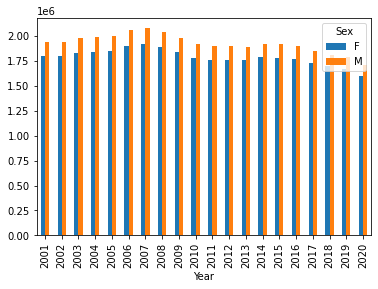

In [90]:
year_sex.plot(kind='bar');

margins: bool, default False
Add all row / columns (e.g. for subtotal / grand totals).

In [91]:
babynames

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
...,...,...,...,...
31266,zykell,M,5,2020
31267,zylus,M,5,2020
31268,zymari,M,5,2020
31269,zyn,M,5,2020


In [97]:
pdname_sex = pd.pivot_table(babynames, index='Name', columns='Sex', values='Count',
                            aggfunc='sum', fill_value=0., margins=True)
pdname_sex.head()

Sex,F,M,All
Name,,,
aaban,0,120,120
aabha,46,0,46
aabid,0,16,16
aabidah,5,0,5
aabir,0,10,10


In [98]:
#Compute proportion of female babies given each name.
prop_female = (pdname_sex['F'] / pdname_sex['All'])

In [99]:
prop_female

Name
aaban      0.000000
aabha      1.000000
aabid      0.000000
aabidah    1.000000
aabir      0.000000
             ...   
zyvon      0.000000
zyyanna    1.000000
zyyon      0.000000
zzyzx      0.000000
All        0.494806
Length: 100365, dtype: float64

Testing a few names

In [100]:
prop_female['aadan']

0.0

In [101]:
prop_female['zyra']

1.0

In [103]:
prop_female['joey']

0.1151411838174484

In [104]:
prop_female['isaac']

0.002527827840211856

In [102]:
prop_female['avery']

0.7021478300997172

## Build Simple Classifier (Model)

We can define a function to return the most likely `Sex` for a name. If there is an exact tie or the name does not appear in the social security dataset the function returns `Unknown`.

In [105]:
def sex_from_name(name):
    lower_name = name.lower()
    if lower_name not in prop_female.index or prop_female[lower_name] == 0.5:
        return "Unknown"
    elif prop_female[lower_name] > 0.5:
        return "F"
    else:
        return "M"

In [106]:
sex_from_name("isaac")

'M'

In [107]:
sex_from_name("avery")

'F'

# Baby name by state

In [108]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
278689,CA,M,1972,Marlon,87
326964,CA,M,1996,Nicolaus,7
104271,CA,F,1987,Chelsi,11
223908,CA,F,2018,Kailynn,7
274476,CA,M,1969,Victor,518


In [109]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413


In [110]:
most_common_count = babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).iloc[0]["Count"]
most_common_count

2743

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

Find baby names that start with j.

In [112]:
babynames["Name"].head(10)

0         Mary
1        Helen
2      Dorothy
3     Margaret
4      Frances
5         Ruth
6       Evelyn
7        Alice
8     Virginia
9    Elizabeth
Name: Name, dtype: object

In [113]:
starts_with_j = [x[0] == 'J' for x in babynames["Name"]]
babynames[starts_with_j].sample(5)

,State,Sex,Year,Name,Count
309287,CA,M,1989,Jaun,7
103046,CA,F,1987,Jade,100
285348,CA,M,1976,Jebediah,5
281588,CA,M,1974,Josue,31
47429,CA,F,1962,Jeannett,5


In [114]:
j_names = babynames[[x[0] == 'J' for x in babynames["Name"]]]

In [115]:
j_names

,State,Sex,Year,Name,Count
16,CA,F,1910,Josephine,66
44,CA,F,1910,Jean,35
46,CA,F,1910,Jessie,32
59,CA,F,1910,Julia,28
66,CA,F,1910,Juanita,25
...,...,...,...,...,...
393987,CA,M,2020,Jr,5
393988,CA,M,2020,Juaquin,5
393989,CA,M,2020,June,5
393990,CA,M,2020,Juniper,5


In [116]:
#option2
babynames["Name"].str.startswith('J').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [117]:
starts_with_j = babynames["Name"].str.startswith('J')
starts_with_j.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [118]:
babynames[babynames["Name"].str.startswith('J')].sample(5)

,State,Sex,Year,Name,Count
19277,CA,F,1942,Jeanine,10
307122,CA,M,1988,Juanantonio,6
282032,CA,M,1974,Jaysen,9
387513,CA,M,2018,Jullian,9
145189,CA,F,1998,Jesika,5


In [119]:
babynames[babynames["Name"].str.contains('ad')].sample(5)

,State,Sex,Year,Name,Count
201727,CA,F,2013,Madelyn,349
319214,CA,M,1993,Kaden,8
317311,CA,M,1992,Gerad,5
20851,CA,F,1944,Nadine,59
179814,CA,F,2007,Madelaine,7


In [120]:
babynames["Name"].str.split('a').to_frame().head(5)

,Name
0,"[M, ry]"
1,[Helen]
2,[Dorothy]
3,"[M, rg, ret]"
4,"[Fr, nces]"


Sort names by their length.

In [121]:
babynames.iloc[[i for i, m in sorted(enumerate(babynames['Name']), key=lambda x: -len(x[1]))]].head(5)

,State,Sex,Year,Name,Count
102490,CA,F,1986,Mariadelosangel,5
305111,CA,M,1987,Franciscojavier,5
306544,CA,M,1988,Franciscojavier,10
309451,CA,M,1989,Franciscojavier,6
314358,CA,M,1991,Ryanchristopher,7


In [122]:
#create a new series of only the lengths
babyname_lengths = babynames["Name"].str.len()

#add that series to the dataframe as a column
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [123]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
332035,CA,M,1998,Franciscojavier,6,15
329864,CA,M,1997,Franciscojavier,5,15
320036,CA,M,1993,Ryanchristopher,5,15
314358,CA,M,1991,Ryanchristopher,7,15
319923,CA,M,1993,Johnchristopher,5,15


In [124]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis = 1)
babynames.head(5)

,State,Sex,Year,Name,Count
332035,CA,M,1998,Franciscojavier,6
329864,CA,M,1997,Franciscojavier,5
320036,CA,M,1993,Ryanchristopher,5
314358,CA,M,1991,Ryanchristopher,7
319923,CA,M,1993,Johnchristopher,5


We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [125]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

#create the temporary column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

#sort by the temporary column
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)

#drop that column
babynames = babynames.drop("dr_ea_count", 1)
babynames.head(5)

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
101962,CA,F,1986,Deandrea,6
115942,CA,F,1990,Deandrea,5
300700,CA,M,1985,Deandrea,6
108715,CA,F,1988,Deandrea,5


option2 Generate an index sorted in the desired order.

In [126]:
#let's start over by first scrambling the order of babynames
babynames = babynames.sample(frac=1)
babynames.head(5)

,State,Sex,Year,Name,Count
53330,CA,F,1966,Esther,143
73706,CA,F,1976,Natalie,408
204747,CA,F,2013,Evoleth,6
213551,CA,F,2016,Madison,923
25378,CA,F,1948,Esperanza,41


Another approach is to take advantage of the fact that .loc can accept an index. That is:
 + df.loc[idx] returns df with its rows in the same order as the given index.
 + Only works if the index exactly matches the DataFrame.

The first step was to create a sequence of the lengths of the names.

In [127]:
name_lengths = babynames["Name"].str.len()
name_lengths.head(5)

53330     6
73706     7
204747    7
213551    7
25378     9
Name: Name, dtype: int64

The next step is to sort the new series we just created.

In [128]:
name_lengths_sorted_by_length = name_lengths.sort_values()
name_lengths_sorted_by_length.head(5)

304810    2
111624    2
110190    2
119755    2
346558    2
Name: Name, dtype: int64

Next, we pass the index of the sorted series to the loc method of the original dataframe.

In [129]:
index_sorted_by_length = name_lengths_sorted_by_length.index
index_sorted_by_length

Int64Index([304810, 111624, 110190, 119755, 346558,  87778, 315715, 254371,
            236729, 349719,
            ...
            326729, 314358, 314479, 309451, 306544, 330040, 337003, 329864,
            319923, 102490],
           dtype='int64', length=394179)

In [130]:
babynames.loc[index_sorted_by_length].head(5)

,State,Sex,Year,Name,Count
304810,CA,M,1987,An,6
111624,CA,F,1989,Ma,7
110190,CA,F,1989,Ka,23
119755,CA,F,1991,Ia,5
346558,CA,M,2004,Bo,12


Note we can also do this all in one line:

In [131]:
babynames.loc[babynames["Name"].str.len().sort_values().index].head(5)

,State,Sex,Year,Name,Count
304810,CA,M,1987,An,6
111624,CA,F,1989,Ma,7
110190,CA,F,1989,Ka,23
119755,CA,F,1991,Ia,5
346558,CA,M,2004,Bo,12


## Name whose popularity has changed the most.

In [132]:
jennifer_counts = babynames.query("Name == 'Jennifer'")["Count"]
jennifer_counts.head(5)

69302     5675
54974     1902
303888      23
287534      24
16324        5
Name: Count, dtype: int64

The AMMD for Jennifer is 6,061, as seen below:

In [133]:
max(jennifer_counts) - min(jennifer_counts)

6059

In [134]:
def ammd(series): #AMMD (absolute max/min difference): max(count) - min(count).
    return max(series) - min(series)

In [135]:
ammd(jennifer_counts)

6059

In [136]:
#option1
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6061
ammd_of_babyname_counts = {}
for name in sorted(babynames["Name"].unique())[0:100]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)
    
#convert to series
ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 
ammd_of_babyname_counts.head(5)

Aadan        2
Aadarsh      0
Aaden      148
Aadhav       2
Aadhira      4
dtype: int64

Option2: use the very powerful groupby.agg operation, which allows us to simply and efficiently compute what we want.

In [137]:
babynames

,State,Sex,Year,Name,Count
53330,CA,F,1966,Esther,143
73706,CA,F,1976,Natalie,408
204747,CA,F,2013,Evoleth,6
213551,CA,F,2016,Madison,923
25378,CA,F,1948,Esperanza,41
...,...,...,...,...,...
47086,CA,F,1962,Deeanna,7
391499,CA,M,2020,Giovanni,481
277898,CA,M,1971,Burton,10
33094,CA,F,1954,Della,49


In [138]:
babynames[(babynames['Name'] == 'Aadan')]

,State,Sex,Year,Name,Count
361678,CA,M,2009,Aadan,6
376558,CA,M,2014,Aadan,5
358560,CA,M,2008,Aadan,7


In [139]:
babynames.groupby("Name").agg(ammd).head(5)

,Year,Count
Name,,
Aadan,6,2
Aadarsh,0,0
Aaden,13,148
Aadhav,5,2
Aadhira,3,4


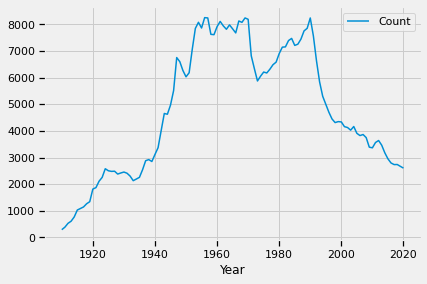

In [140]:
babynames.groupby("Year").agg(ammd).plot()

In [141]:
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                  'C': np.random.randn(4)})

In [142]:
df

,A,B,C
0,1,1,0.065446
1,1,2,0.233834
2,2,3,0.304405
3,2,4,-1.296380


In [143]:
df.groupby('A').agg('min')

,B,C
A,,
1,1,0.065446
2,3,-1.296380


In [144]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2  0.065446  0.233834
2   3   4 -1.296380  0.304405

## Other groupby Features

It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the total number of babies of each sex born in each year.

In [145]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

The DataFrame resulting from the aggregation operation is now multi-indexed. That is, it has more than one dimension to its index. We will explore this in next week's exercises.

### groupby.size()

In [146]:
#size returns a Series giving the size of each group
babynames.groupby("Year").size().tail(15)

Year
2006    7076
2007    7250
2008    7158
2009    7121
2010    7010
2011    6883
2012    7011
2013    6864
2014    6954
2015    6874
2016    6777
2017    6692
2018    6547
2019    6510
2020    6363
dtype: int64

## Finding the number of babies born in each year of each sex.

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to groupby using both columns of interest.

In [147]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

A more natural approach is to use a pivot table. https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [148]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc=np.max, # group operation
)
babynames_pivot.head(6)

Sex,F,M
Year,,
1910,295,237
1911,390,214
1912,534,501
1913,584,614
1914,773,769
1915,998,1033


Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [149]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413
